### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Agregar identificador de tienda
tienda['tienda_id'] = 'Tienda 1'
tienda2['tienda_id'] = 'Tienda 2'
tienda3['tienda_id'] = 'Tienda 3'
tienda4['tienda_id'] = 'Tienda 4'

# Unir todos los datos
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular ingreso total por tienda
ingresos = datos.groupby('tienda_id')['Precio'].sum().round(2)
ingresos = ingresos.sort_values(ascending=False)

print("Ingresos totales por tienda:")
print(ingresos)

Ingresos totales por tienda:
tienda_id
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


# 2. Ventas por categoría

In [3]:

# --- Calcular cantidad de productos vendidos por categoría y tienda ---
ventas_por_categoria = (
    datos
    .groupby(['tienda_id', 'Categoría del Producto'])  # agrupar por tienda y categoría
    .size()                               # contar cantidad de registros (ventas)
    .reset_index(name='Cantidad_Vendida') # renombrar columna
)

# --- Ordenar de mayor a menor dentro de cada tienda ---
ventas_por_categoria = (
    ventas_por_categoria
    .sort_values(['tienda_id', 'Cantidad_Vendida'], ascending=[True, False])
)

print("Cantidad de productos vendidos por categoría en cada tienda:\n")
print(ventas_por_categoria)

# --- Mostrar las categorías más populares (mayor cantidad) por tienda ---
print("\nCategorías más populares por tienda:\n")
categorias_populares = (
    ventas_por_categoria
    .groupby('tienda_id')
    .head(3)  # puedes ajustar este número para mostrar el top deseado
)
print(categorias_populares)

Cantidad de productos vendidos por categoría en cada tienda:

   tienda_id   Categoría del Producto  Cantidad_Vendida
7   Tienda 1                  Muebles               465
3   Tienda 1             Electrónicos               448
5   Tienda 1                 Juguetes               324
2   Tienda 1        Electrodomésticos               312
1   Tienda 1     Deportes y diversión               284
4   Tienda 1   Instrumentos musicales               182
6   Tienda 1                   Libros               173
0   Tienda 1  Artículos para el hogar               171
15  Tienda 2                  Muebles               442
11  Tienda 2             Electrónicos               422
13  Tienda 2                 Juguetes               313
10  Tienda 2        Electrodomésticos               305
9   Tienda 2     Deportes y diversión               275
12  Tienda 2   Instrumentos musicales               224
14  Tienda 2                   Libros               197
8   Tienda 2  Artículos para el hogar     

# 3. Calificación promedio de la tienda


In [4]:
# Calcular la calificación promedio por tienda
promedio_calificaciones = (
    datos
    .groupby('tienda_id')['Calificación']  # <-- ajusta el nombre de la columna si es diferente
    .mean()
    .round(2)  # redondea a 2 decimales
    .sort_values(ascending=False)
)

print("Calificación promedio de los clientes por tienda:\n")
print(promedio_calificaciones)

Calificación promedio de los clientes por tienda:

tienda_id
Tienda 3    4.05
Tienda 2    4.04
Tienda 4    4.00
Tienda 1    3.98
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

🔝 Productos más vendidos por tienda:

    tienda_id                   Producto  Cantidad_Vendida
1    Tienda 1                    Armario                60
33   Tienda 1                 Microondas                60
48   Tienda 1              TV LED UHD 4K                60
75   Tienda 2  Iniciando en programación                65
84   Tienda 2                 Microondas                62
58   Tienda 2                    Batería                61
129  Tienda 3              Kit de bancas                57
113  Tienda 3                  Cama king                56
133  Tienda 3            Mesa de comedor                56
163  Tienda 4                   Cama box                62
168  Tienda 4                 Cubertería                59
164  Tienda 4                  Cama king                56

🔻 Productos menos vendidos por tienda:

    tienda_id                   Producto  Cantidad_Vendida
4    Tienda 1  Auriculares con micrófono                33
13   Tienda 1               Celular 

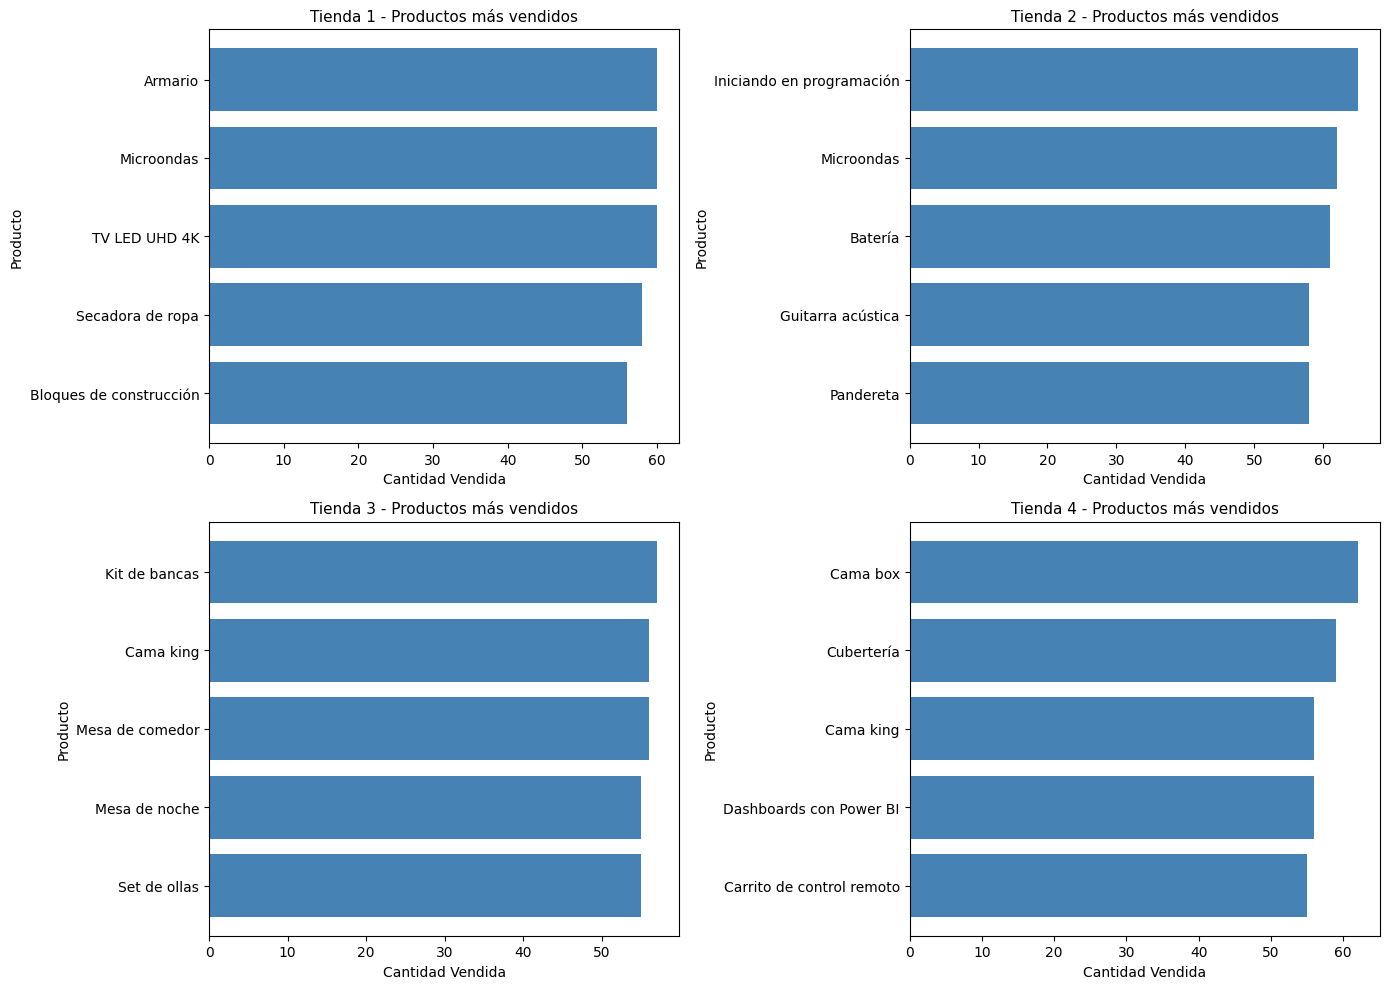

In [5]:
import matplotlib.pyplot as plt

# --- Calcular cantidad de ventas por producto y tienda ---
ventas_producto = (
    datos
    .groupby(['tienda_id', 'Producto'])
    .size()
    .reset_index(name='Cantidad_Vendida')
)

# --- Ordenar los resultados ---
ventas_producto = ventas_producto.sort_values(['tienda_id', 'Cantidad_Vendida'], ascending=[True, False])

# --- Mostrar los 3 productos más vendidos por tienda ---
print("🔝 Productos más vendidos por tienda:\n")
productos_mas_vendidos = ventas_producto.groupby('tienda_id').head(3)
print(productos_mas_vendidos)

# --- Mostrar los 3 productos menos vendidos por tienda ---
print("\n🔻 Productos menos vendidos por tienda:\n")
productos_menos_vendidos = (
    ventas_producto
    .groupby('tienda_id')
    .tail(3)
    .sort_values(['tienda_id', 'Cantidad_Vendida'])
)
print(productos_menos_vendidos)

# --- Visualización: gráfico de los productos más vendidos por tienda ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

tiendas = datos['tienda_id'].unique()

for i, tienda in enumerate(tiendas):
    top_productos = (
        ventas_producto[ventas_producto['tienda_id'] == tienda]
        .head(5)  # top 5 productos
    )

    axes[i].barh(top_productos['Producto'], top_productos['Cantidad_Vendida'], color='steelblue')
    axes[i].invert_yaxis()  # producto más vendido arriba
    axes[i].set_title(f'{tienda} - Productos más vendidos', fontsize=11)
    axes[i].set_xlabel('Cantidad Vendida')
    axes[i].set_ylabel('Producto')

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [6]:
# Calcular el costo de envío promedio por tienda
costo_envio_promedio = (
    datos
    .groupby('tienda_id')['Costo de envío']   # <-- reemplaza 'Envio' por el nombre exacto de la columna
    .mean()
    .round(2)  # redondea a dos decimales
    .sort_values(ascending=False)
)

print("Costo de envío promedio por tienda (pagado por el cliente):\n")
print(costo_envio_promedio)

Costo de envío promedio por tienda (pagado por el cliente):

tienda_id
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


#Graficos

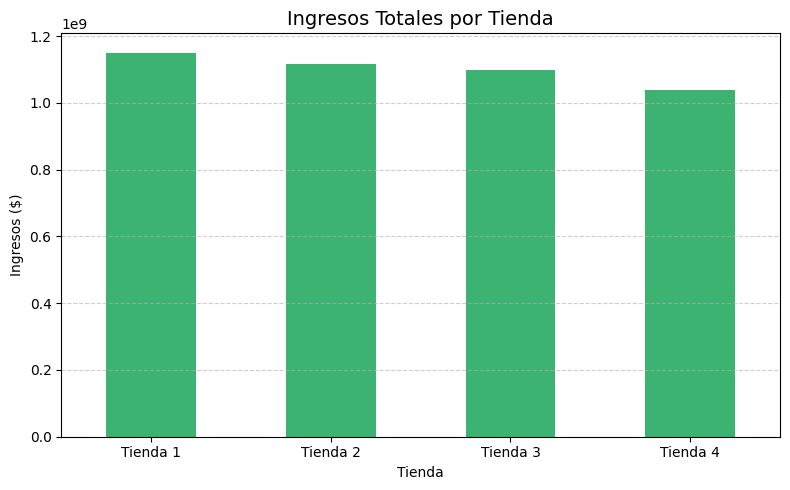

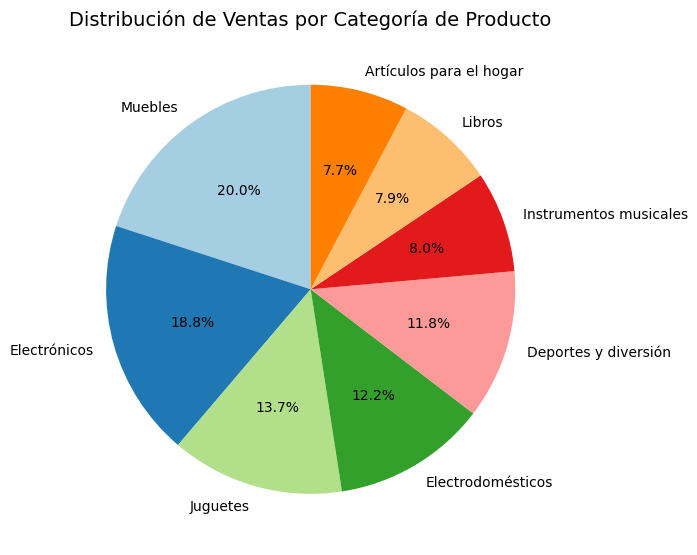

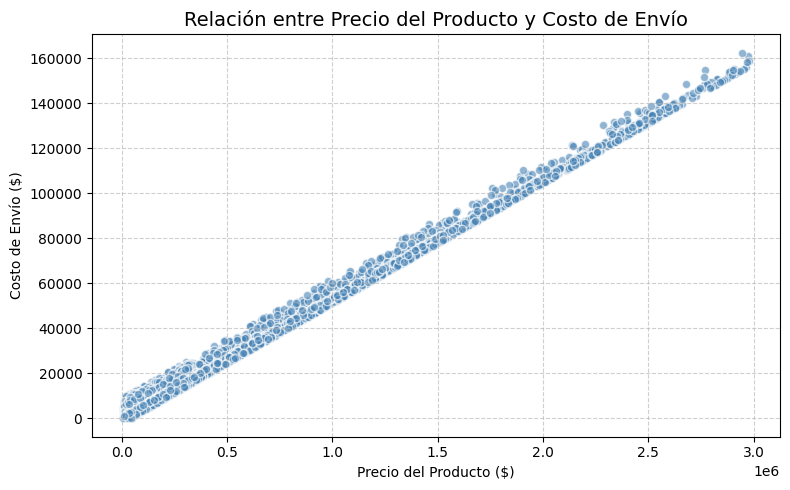

In [7]:
import matplotlib.pyplot as plt

# --- 1️⃣ Gráfico de barras: Ingresos totales por tienda ---
ingresos = datos.groupby('tienda_id')['Precio'].sum().round(2)
plt.figure(figsize=(8,5))
ingresos.plot(kind='bar', color='mediumseagreen')
plt.title('Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 2️⃣ Gráfico de pastel: Distribución de categorías de productos ---
categorias = datos['Categoría del Producto'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Ventas por Categoría de Producto', fontsize=14)
plt.tight_layout()
plt.show()

# --- 3️⃣ Gráfico de dispersión: Relación entre Precio y Envío ---
plt.figure(figsize=(8,5))
plt.scatter(datos['Precio'], datos['Costo de envío'], alpha=0.6, color='steelblue', edgecolors='white')
plt.title('Relación entre Precio del Producto y Costo de Envío', fontsize=14)
plt.xlabel('Precio del Producto ($)')
plt.ylabel('Costo de Envío ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#**Informe final**

##1) **Introduccion**

El propósito de este análisis es determinar en cuál de las cuatro tiendas conviene que el Sr. Juan oriente sus ventas, considerando múltiples dimensiones: ingresos totales, popularidad de categorías, productos más y menos vendidos, calificaciones promedio de clientes y costo de envío promedio. La decisión se toma integrando tanto métricas económicas como indicadores de satisfacción y costos logísticos.

##2) **Metodologia**

Se consolidaron los datos de las cuatro tiendas en un único DataFrame.

Se calcularon: ingresos totales por tienda, conteos de ventas por categoría, top/ bottom productos por tienda, calificación promedio por tienda y costo de envío promedio por tienda.

Se generaron visualizaciones (barras para ingresos, pastel/ barras para categorías, scatter para precio vs envío, y gráficos por tienda para top productos) para apoyar la interpretación de resultados.



##3) **Resultados principales**


### Ingresos totales por tienda
Tienda 1: 1.150.880.000

Tienda 2: 1.116.344.000

Tienda 3: 1.098.020.000

Tienda 4: 1.038.376.000

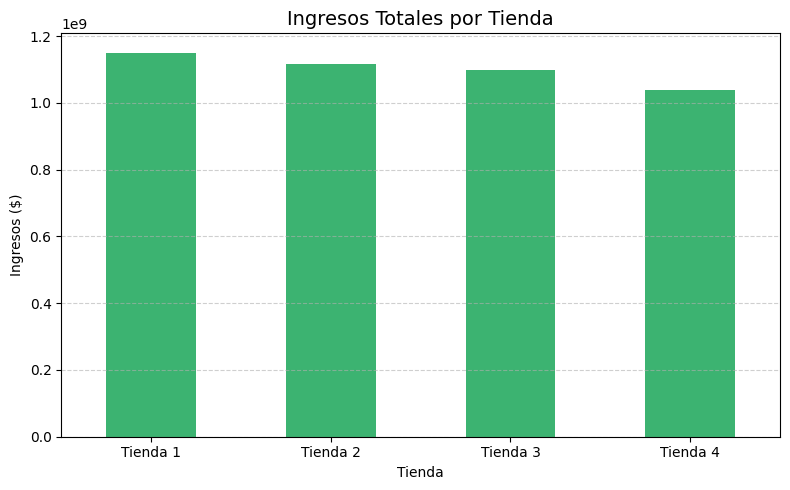

Interpretación: Tienda 1 registra el mayor ingreso absoluto (≈+34 M frente a Tienda 2; ≈+52 M frente a Tienda 3), pero las diferencias no son abrumadoras: todas las tiendas están en rangos de miles de millones cercanos.

###Distribución de ventas por categoría (resumen top 3 por tienda)
Todas las tiendas comparten un patrón similar en las categorías más vendidas:

Top categorías (por tienda):

Muebles (máximo: Tienda 3 = 499, Tienda 1 = 465, etc.)

Electrónicos (rango ~ 448–451)

Juguetes (rango ~313–338)

Interpretación: El negocio está fuertemente impulsado por Muebles y Electrónicos, con Juguetes en tercer lugar. Esto indica que cualquier estrategia de inventario o marketing debe priorizar estas categorías.

### Productos más vendidos
Tienda 1 (top): Armario (60), Microondas (60), TV LED UHD 4K (60)

Tienda 2 (top): Iniciando en programación (65), Microondas (62), Batería (61)

Tienda 3 (top): Kit de bancas (57), Cama king (56), Mesa de comedor (56)

Tienda 4 (top): Cama box (62), Cubertería (59), Cama king (56)
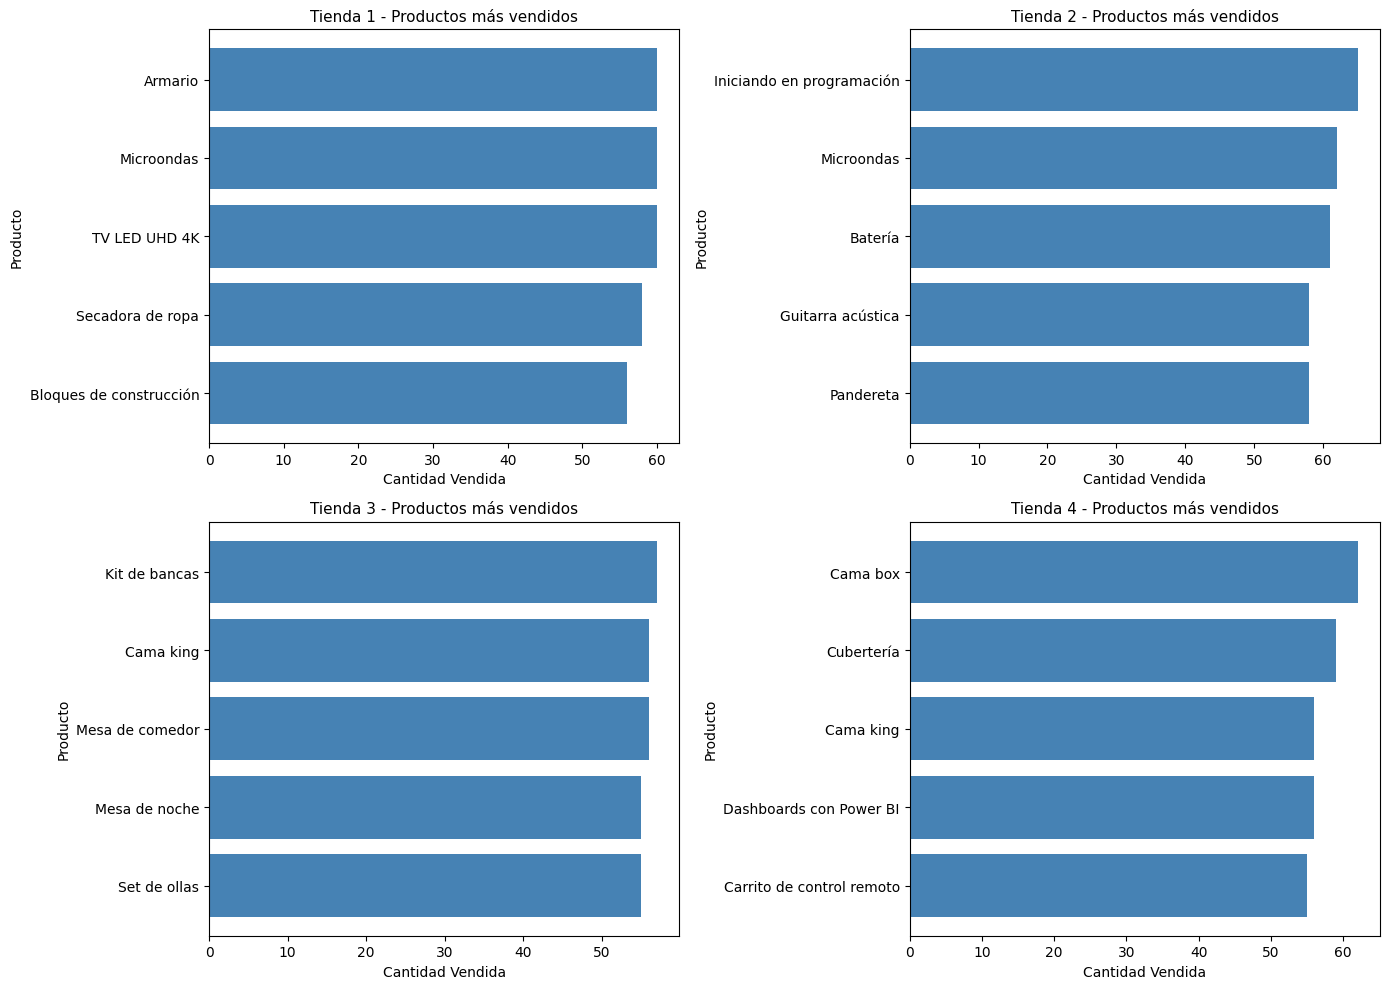

Interpretación: Productos de mobiliario y electrodomésticos dominan el top ventas; Tienda 2 tiene un pico en un producto de contenido (curso/libro) con 65 unidades, lo que sugiere una ligera diferenciación de mix en esa tienda.

### Calificación promedio de clientes
Tienda 3: 4.05

Tienda 2: 4.04

Tienda 4: 4.00

Tienda 1: 3.98

Interpretación: Tienda 3 presenta la mejor calificación promedio y Tienda 1 la más baja (aunque las diferencias son pequeñas: rango 3.98–4.05). Aun así, una calificación más alta suele asociarse a menor tasa de devoluciones, mayor fidelidad y mejor reputación.

###Costo de envío promedio
Tienda 1: 26.018,61

Tienda 2: 25.216,24

Tienda 3: 24.805,68

Tienda 4: 23.459,46

Interpretación: Tienda 1 tiene el envío promedio más alto (≈26k), y Tienda 4 el más bajo (≈23.5k). Costos de envío más altos pueden afectar la conversión y la satisfacción si el cliente percibe mal la relación precio-valor.

##4) Análisis integrado (fortalezas y debilidades por tienda)
Tienda 1

Fortalezas: Mayor ingreso total; top productos con buenos volúmenes en muebles y electrónica.

Debilidades: Calificación más baja (3.98) y envío promedio más alto (26.018) → riesgo de menor fidelidad y fricción en conversión por alto costo logístico.

Valoración: Buena capacidad de ventas actuales, pero con problemas potenciales de satisfacción y costos logísticos.

Tienda 2

Fortalezas: Segundo ingreso más alto; calificación sólida (4.04). Es competitiva en electrónica y muebles.

Debilidades: Envío promedio alto (25.216), aunque menor que Tienda 1.

Valoración: Buena candidata: mezcla entre ingreso y satisfacción.

Tienda 3

Fortalezas: Calificación más alta (4.05), productos top en muebles con el mayor conteo por categoría (Muebles = 499), envío promedio moderado/bajo (24.805). Rendimiento en ventas cercano al top (tercera en ingresos).

Debilidades: Ingresos totales ligeramente menores frente a Tienda 1/2.

Valoración: Excelente equilibrio entre sólidas ventas, mejor experiencia cliente y envío competitivo. Indica mayor sostenibilidad a mediano-largo plazo.

Tienda 4

Fortalezas: Menor costo de envío promedio (23.459), ranking relativamente cercano en ventas por categoría.

Debilidades: Ingresos totales más bajos (la menor entre las cuatro), calificación intermedia (4.00).

Valoración: Buena opción si la prioridad es minimizar costos de envío, pero menor volumen general.

##5)**Recomendaciones**
Recomendación principal: Vender en Tienda 3.

Justificación

Satisfacción del cliente: Tienda 3 tiene la calificación promedio más alta (4.05) — una señal clave de buena experiencia postventa, menor tasa de devoluciones y mayor probabilidad de recomendaciones y repetición de compra.

Volumen y mix de categorías: Tienda 3 muestra los conteos más altos en la categoría principal (Muebles = 499) y mantiene altos volúmenes en Electrónicos y Juguetes; esto sugiere una demanda estable en las categorías que impulsan ingresos.

Costos logísticos razonables: El costo de envío promedio de Tienda 3 (≈24.805) es más bajo que el de Tienda 1 y 2; costos de envío competitivos reducen fricción de compra y mejoran percepción del valor.

Ingreso cercano al top: Aunque Tienda 1 es la que más ingresa, la diferencia con Tienda 3 no es enorme; la combinación de mejor rating + envío más bajo hace que Tienda 3 ofrezca mayor sostenibilidad y menor riesgo en el mediano plazo.

En definitiva: Tienda 3 maximiza la relación entre satisfacción del cliente, mix de productos ganadores y costos logísticos competitivos, lo que la convierte en la opción más robusta para que el Sr. Juan oriente su venta.


###6)**Conclusion**
Tomando en cuenta ingresos, popularidad de categorías y productos, satisfacción de clientes y costos de envío, la mejor opción equilibrada y con mayor potencial de crecimiento sostenible es Tienda 3. Ofrece el mejor balance entre volumen de ventas en las categorías clave, la mejor calificación de clientes y costos de envío competitivos, lo que reduce riesgos operativos y aumenta la probabilidad de éxito a mediano y largo plazo para el Sr. Juan.

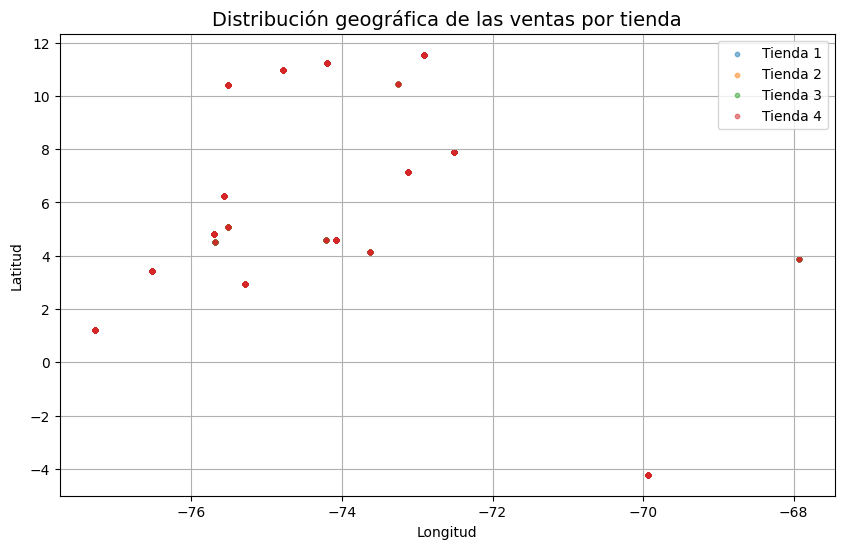

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for tienda, grupo in datos.groupby('tienda_id'):
    plt.scatter(grupo['lon'], grupo['lat'], s=10, alpha=0.5, label=tienda)

plt.title('Distribución geográfica de las ventas por tienda', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()


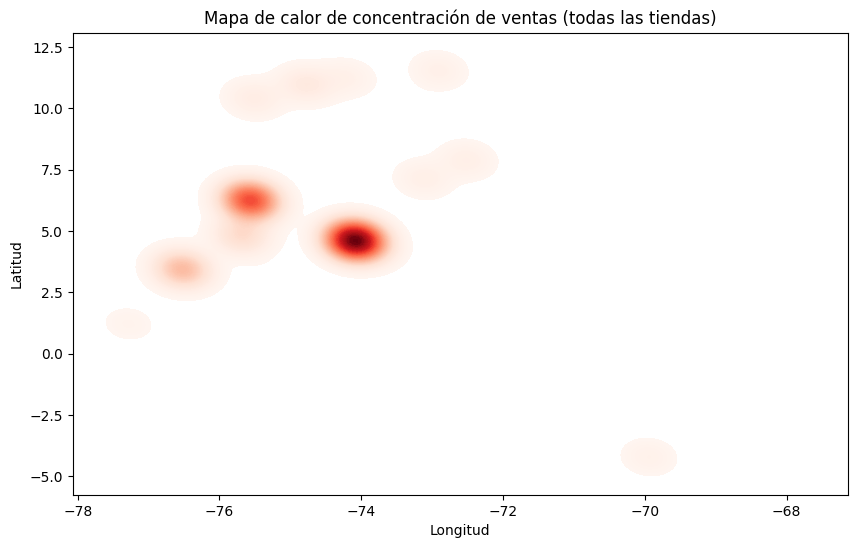

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=datos['lon'],
    y=datos['lat'],
    fill=True,
    cmap="Reds",
    thresh=0.05,
    levels=100
)
plt.title("Mapa de calor de concentración de ventas (todas las tiendas)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


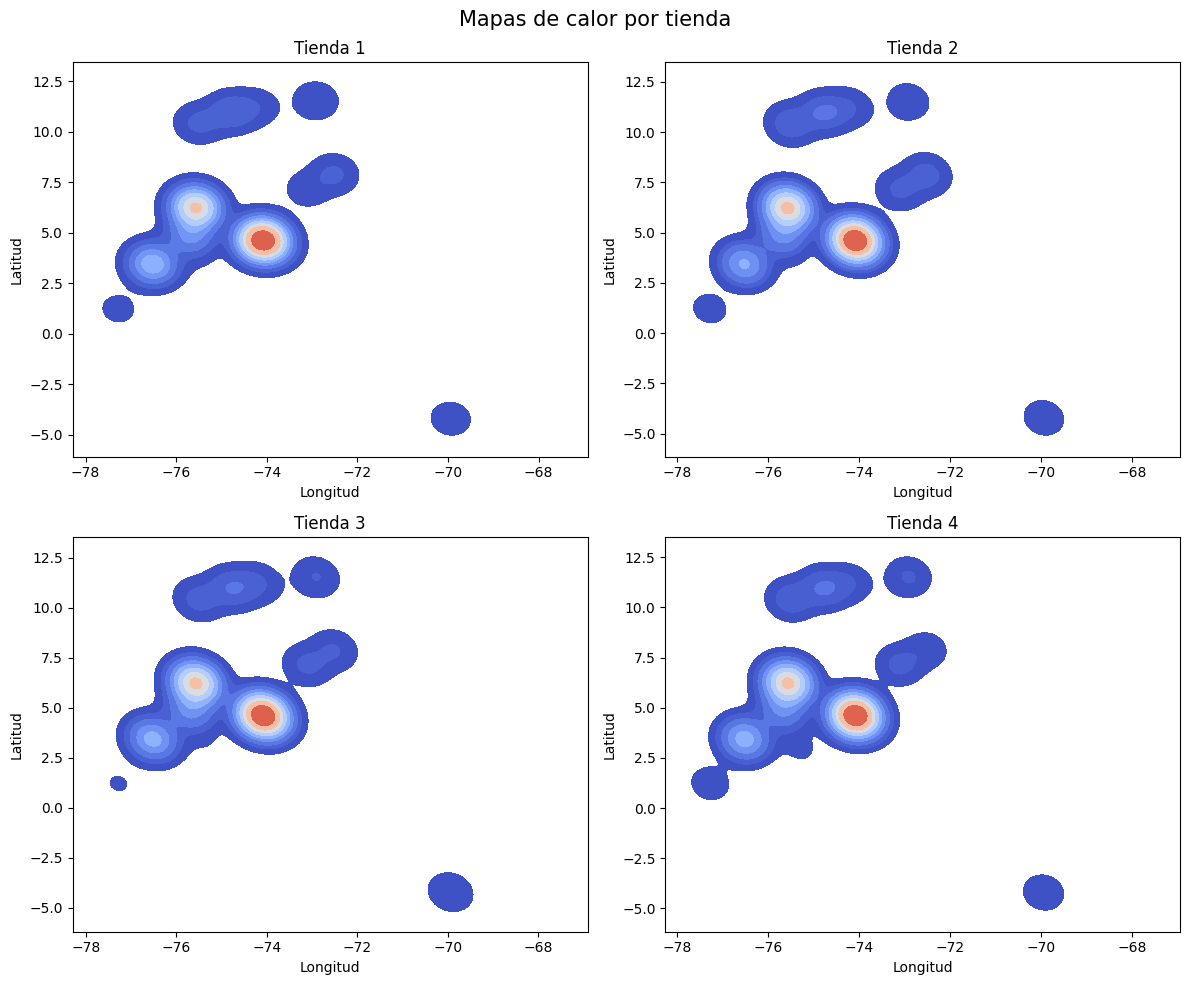

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (tienda, grupo) in enumerate(datos.groupby('tienda_id')):
    sns.kdeplot(
        x=grupo['lon'],
        y=grupo['lat'],
        fill=True,
        cmap="coolwarm",
        thresh=0.05,
        ax=axes[i]
    )
    axes[i].set_title(f"{tienda}")
    axes[i].set_xlabel("Longitud")
    axes[i].set_ylabel("Latitud")

plt.suptitle("Mapas de calor por tienda", fontsize=15)
plt.tight_layout()
plt.show()
